In [2]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 16)

In [3]:
def read_tejaas(filename):
    rsidlist = list()
    qscrlist = list()
    qmeanlist = list()
    qvarlist  = list()
    qscalelist = list()
    pvallist = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            qscr = float(linesplit[2])
            qmean = float(linesplit[3])
            qvar = float(linesplit[4])
            pval = float(linesplit[5])
            
            qscale = (qscr - qmean) / qvar
            rsidlist.append(rsid)
            qscrlist.append(qscr)
            qmeanlist.append(qmean)
            qvarlist.append(qvar)
            qscalelist.append(qscale)
            pvallist.append(pval)

    return rsidlist, pvallist, qscrlist, qmeanlist, qvarlist, qscalelist

In [4]:
pvals = list()
qstat = list()
qmean = list()
qvars = list()
qscale = list()

for sim in range(1):
    simdir = "sim{:03d}".format(sim)
    paramdir = "16151_450_10_800_30_150_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02"
    srcdir = os.path.join('/scratch/sbanerj/trans-eqtl/simulation/', paramdir, simdir)
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.1_knn/raw/peer0/rr.txt')
    
    rr_rsids, rr_pvals, rr_qstats, rr_qmeans, rr_qvars, rr_qscale = read_tejaas(rrfile)
    pvals += rr_pvals
    qstat += rr_qstats
    qmean += rr_qmeans
    qvars += rr_qvars
    qscale += rr_qscale

qstat = np.array(qstat)
pvals = np.array(pvals)
pmin  = np.min(pvals[np.where(pvals > 0)])
nonzero_pvals = pvals.copy()
nonzero_pvals[np.where(pvals == 0)] = pmin
log10pvals = -np.log10(nonzero_pvals)
qmean = np.array(qmean)
qvars = np.array(qvars)
qscale = np.array(qscale)

In [5]:
pvals2 = list()
qstat2 = list()
qmean2 = list()
qvars2 = list()
qscale2 = list()

for sim in range(1):
    simdir = "sim{:03d}".format(sim)
    paramdir = "16151_450_10_800_30_150_100_0.01_0.5_0.0_2.0_0.6_4.0_0.1_20_0.02"
    srcdir = os.path.join('/scratch/sbanerj/trans-eqtl/simulation/', paramdir, simdir)
    rrfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.1_knn/raw/peer0/rr.txt')
    
    rr_rsids, rr_pvals, rr_qstats, rr_qmeans, rr_qvars, rr_qscale = read_tejaas(rrfile)
    pvals2 += rr_pvals
    qstat2 += rr_qstats
    qmean2 += rr_qmeans
    qvars2 += rr_qvars
    qscale2 += rr_qscale

qstat2 = np.array(qstat2)
pvals2 = np.array(pvals2)
pmin  = np.min(pvals2[np.where(pvals2 > 0)])
nonzero_pvals = pvals2.copy()
nonzero_pvals[np.where(pvals2 == 0)] = pmin
log10pvals2 = -np.log10(nonzero_pvals)
qmean2 = np.array(qmean2)
qvars2 = np.array(qvars2)
qscale2 = np.array(qscale2)

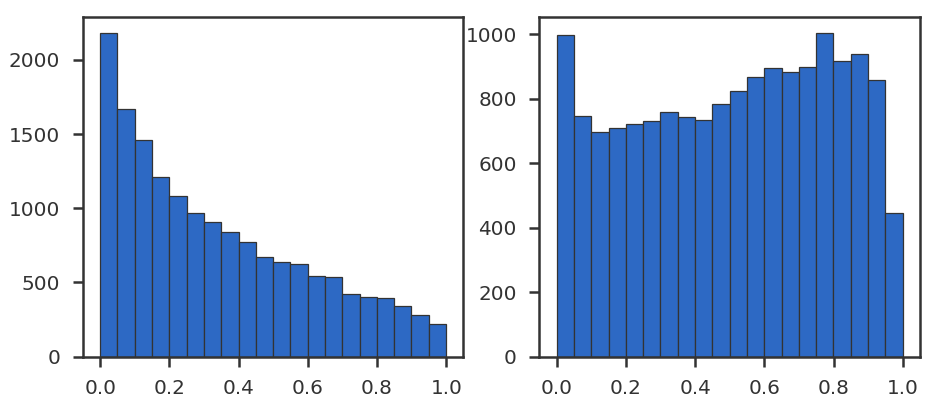

In [6]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#nchoose = np.sort(np.random.choice(pvals.shape[0], size = 10000, replace = False))
ax1.hist(pvals)
ax2.hist(pvals2)
plt.show()

In [ ]:
len(pvals)

In [ ]:
# Q-Q plot
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

prand = np.random.uniform(0, 1, size = pvals.shape[0])
prand_sort = np.sort(prand)
pvals_sort = np.sort(pvals)
pvals2_sort = np.sort(pvals2)
ax1.plot(-np.log10(prand_sort), -np.log10(pvals_sort))
#ax1.plot([0, 1], [0, 1])

ax1.plot(-np.log10(prand_sort), -np.log10(pvals2_sort))
#ax2.plot([0, 1], [0, 1])

plt.show()

In [ ]:
# Check the p-value distribution
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.hist(qstat, bins = 100, alpha = 0.5, color = 'blue')
ax1.hist(qstat2, bins = 100, alpha = 0.5, color = 'red')
#ax2.hist(gwqscaled2[nchoose])
#ax1.set_xlim([-5, 5])
plt.show()

In [ ]:
# Check the p-value distribution
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.hist(qmean, bins = 100, alpha = 0.5)
ax1.hist(qmean2, bins = 100, alpha = 0.5)
#ax2.hist(gwqscaled2[nchoose])
#ax1.set_xlim([-5, 5])
plt.show()

In [ ]:
# Check the p-value distribution
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.hist(qvars, bins = 100, alpha = 0.5)
ax1.hist(qvars2, bins = 100, alpha = 0.5)
#ax2.hist(gwqscaled2[nchoose])
#ax1.set_xlim([-5, 5])
plt.show()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.hist(normdist, bins = 100, alpha = 0.2, density = True)
ax1.hist(qscale, bins = 100, alpha = 0.2, density = True)
ax1.hist(qscale2, bins = 100, alpha = 0.2, density = True)

plt.show()

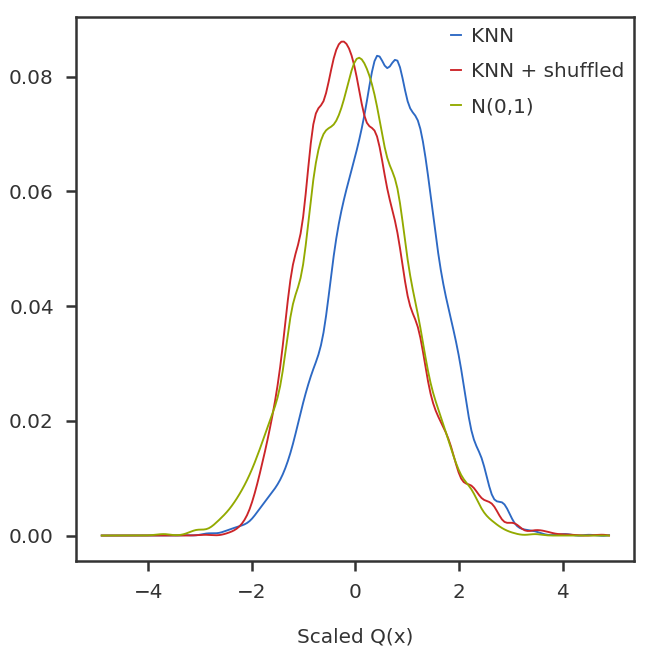

In [7]:
# Check the p-value distribution
fig = plt.figure()
ax1 = fig.add_subplot(111)

normdist = np.random.normal(0, 1, size = qscale.shape[0])

# ax1.hist(normdist, bins = 100, alpha = 0.1)
# ax1.hist(qscale, bins = 100, alpha = 0.1)
# ax1.hist(qscale2, bins = 100, alpha = 0.1)
# #ax2.hist(gwqscaled2[nchoose])
# #ax1.set_xlim([-5, 5])
# plt.show()

from scipy.interpolate import interp1d
bins = np.linspace(-5, 5, 50)
xbin = [(bins[i] + bins[i+1]) / 2 for i in range(bins.shape[0] - 1)] # centers of the bins
x = np.linspace(xbin[0], xbin[-1], 200)

yhist, _ = np.histogram(qscale, bins = bins)
yfreq = yhist / len(qscale)
fy = interp1d(xbin, yfreq, kind = 'cubic')
y = fy(x)
ax1.plot(x, y, alpha = 1, label = 'KNN')

yhist, _ = np.histogram(qscale2, bins = bins)
yfreq = yhist / len(qscale2)
fy = interp1d(xbin, yfreq, kind = 'cubic')
y = fy(x)
ax1.plot(x, y, alpha = 1, label = 'KNN + shuffled')

yhist, _ = np.histogram(normdist, bins = bins)
yfreq = yhist / len(normdist)
fy = interp1d(xbin, yfreq, kind = 'cubic')
y = fy(x)
ax1.plot(x, y, alpha = 1, label = 'N(0,1)')

ax1.set_xlabel('Scaled Q(x)')
#ax1.set_title('Simulation with GTEx covariance')

ax1.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

nchoose = np.sort(np.random.choice(pvals.shape[0], size = 10000, replace = False))
#ax1.hist(pvals)
ax1.scatter(qstat[nchoose], log10pvals[nchoose], alpha = 0.1)
ax2.scatter(qstat2[nchoose], log10pvals2[nchoose], alpha = 0.1)
plt.show()

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

nchoose = np.sort(np.random.choice(pvals.shape[0], size = 20000, replace = False))
ax1.scatter(qstat[nchoose], qmean[nchoose], s = 2, alpha = 0.9)
ax2.scatter(qstat2[nchoose], qmean2[nchoose], s = 2, alpha = 0.9)
#ax1.plot([25, 175], [25, 175], color = 'red')
plt.show()

In [ ]:
pvals.shape

In [ ]:
np.sum(pvals<0.05)

In [ ]:
np.sum(pvals2<0.05)